<a href="https://colab.research.google.com/github/MrMRaut/NEWS-POPULARITY-REGRESSION-MODEL/blob/main/News_Popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - News Popularity



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual

# **Project Summary -**

News popularity on various social media platforms depends on multiple features like the topic, source of publication, time-span and sentiment score. Here we are provided with a dataset that contains news items and their respective social feedback on different platforms: Facebook, GooglePlus and LinkedIn. Based on the previous trend, this data analysis and prediction with machine learning models can help us understand what are the reasons for news popularity on social media and obtain the best regression model.

# **Problem Statement**


**Building a Machine learning model that should be able to predict the popularity of news topic.**

## ***1. Knowing Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
fe = pd.read_csv(r'/content/drive/MyDrive/Database/News Popularity/Copy of Facebook_Economy.csv')
fm = pd.read_csv(r'/content/drive/MyDrive/Database/News Popularity/Copy of Facebook_Microsoft.csv')
fo = pd.read_csv(r'/content/drive/MyDrive/Database/News Popularity/Copy of Facebook_Obama.csv')
fp = pd.read_csv(r'/content/drive/MyDrive/Database/News Popularity/Copy of Facebook_Palestine.csv')
ge = pd.read_csv(r'/content/drive/MyDrive/Database/News Popularity/Copy of GooglePlus_Economy.csv')
gm = pd.read_csv(r'/content/drive/MyDrive/Database/News Popularity/Copy of GooglePlus_Microsoft.csv')
go = pd.read_csv(r'/content/drive/MyDrive/Database/News Popularity/Copy of GooglePlus_Obama.csv')
gp = pd.read_csv(r'/content/drive/MyDrive/Database/News Popularity/Copy of GooglePlus_Palestine.csv')
le = pd.read_csv(r'/content/drive/MyDrive/Database/News Popularity/Copy of LinkedIn_Economy.csv')
lm = pd.read_csv(r'/content/drive/MyDrive/Database/News Popularity/Copy of LinkedIn_Microsoft.csv')
lo = pd.read_csv(r'/content/drive/MyDrive/Database/News Popularity/Copy of LinkedIn_Obama.csv')
lp = pd.read_csv(r'/content/drive/MyDrive/Database/News Popularity/Copy of LinkedIn_Palestine.csv')

df = pd.read_csv(r'/content/drive/MyDrive/Database/News Popularity/Copy of News_Final.csv')

In [ ]:
# backup main data
df2 = df.copy()

### Dataset First View

In [ ]:
le.head(4)

,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,1,-1,-1,-1,-1,-1,-1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
1,2,-1,-1,-1,-1,-1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
3,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,10,10,10,10,10,10,10,10,10,10


In [ ]:
ge.head(4)

,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,1,-1,-1,-1,-1,-1,-1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,2,-1,-1,-1,-1,-1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,23,23,23,23,23,23,23,23,23,23
3,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
fe.head(4)

,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,1,-1,-1,-1,-1,-1,-1,-1,-1,7,...,13,13,13,13,13,13,13,13,13,13
1,2,-1,-1,-1,-1,-1,-1,-1,-1,3,...,42,42,42,42,42,42,42,42,42,42
2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,98,98,98,98,98,98,98,98,98,98
3,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,7,7,7,7,7,7,7,7,7,7


In [ ]:
df[df.IDLink.isin([1,2,3])].sort_values('IDLink')

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
944,1.0,"On The Economy, Give Obama AD",Hillary Clinton got the laugh line of the week...,Forbes,economy,2015-11-09 22:40:10,0.087462,-0.093750,13,1,2
945,2.0,"To one CEO, 'Janet Yellen's Magic Money Machin...","""""""I believe something is shifting in the unde...",MarketWatch,economy,2015-11-09 22:40:10,0.037689,-0.177667,42,0,0
833,3.0,3 Ways to Jumpstart a Community-Grounded Economy,"This article is part of New Economy Week, a co...",YES! Magazine,economy,2015-11-09 09:40:10,-0.094491,-0.060817,98,23,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'''
Number of Columns = {df.shape[1]}
Number of Rows    = {df.shape[0]}
''')


Number of Columns = 11
Number of Rows    = 93239



### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93239 entries, 0 to 93238
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             93239 non-null  float64
 1   Title              93239 non-null  object 
 2   Headline           93224 non-null  object 
 3   Source             92960 non-null  object 
 4   Topic              93239 non-null  object 
 5   PublishDate        93239 non-null  object 
 6   SentimentTitle     93239 non-null  float64
 7   SentimentHeadline  93239 non-null  float64
 8   Facebook           93239 non-null  int64  
 9   GooglePlus         93239 non-null  int64  
 10  LinkedIn           93239 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 7.8+ MB


#### Duplicate Values

In [ ]:
df[df.duplicated()]

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
44426,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",NaN,palestine,2016-02-28 14:03:00,0.000000,-0.005906,0,0,0
44496,28854.0,Buffett: Politicians 'Dead Wrong' on Economy,Warren Buffett has a message for presidential ...,The Wall Street Journal,economy,2016-02-28 19:17:00,0.051031,-0.037921,-1,-1,-1
44944,80994.0,"Tuesday, 1 Mar 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",NaN,palestine,2016-03-01 00:15:00,-0.243068,0.048546,0,0,0
45122,81052.0,"Monday, 29 Feb 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",NaN,palestine,2016-03-01 09:29:00,0.000000,0.048546,0,0,0


In [ ]:
# Dropping Duplicate Rows
df.drop(df[df.duplicated()].index, axis = 0, inplace = True)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

IDLink                 0
Title                  0
Headline              15
Source               276
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

In [ ]:
df.Source.describe()

count         92959
unique         5756
top       Bloomberg
freq           1732
Name: Source, dtype: object

In [ ]:
df.Source.fillna("Bloomberg", inplace = True)

In [ ]:
df.dropna(inplace = True)

- Filling null values of Source feature with bloomberg since it has the heighest frequency of occurrence.
- Dropping null values since the loss of data is negligible.

In [ ]:
df.isnull().sum()

IDLink               0
Title                0
Headline             0
Source               0
Topic                0
PublishDate          0
SentimentTitle       0
SentimentHeadline    0
Facebook             0
GooglePlus           0
LinkedIn             0
dtype: int64

### Dataset info:

- -1 level of popularity means the news item hasn't come to the platform yet.
0 level of popularity means the news item has landed the platform but is not at all popular as of now.
1 level of popularity means the news item's popularity has increased to 1 and so on.
- Title and Headline columns contain textual data. We would require to use TfidfVectorizer or CountVectorizer to deal with them.
- Topic is the categorical column.
- Source and Headline column contains some null values.
- We also have data whose popularity in all the social media platforms (Dependent Features) is -1. This implies that those are trash data.

## ***2. Understanding Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include = 'all')

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
count,93220.000000,93220,93220,93220,93220,93220,93220.000000,93220.000000,93220.000000,93220.000000,93220.000000
unique,NaN,81250,86694,5755,4,82630,NaN,NaN,NaN,NaN,NaN
top,NaN,Business Highlights,Read full story for latest details.,Bloomberg,economy,2016-05-19 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,NaN,37,18,2008,33922,112,NaN,NaN,NaN,NaN,NaN
mean,51557.640410,NaN,NaN,NaN,NaN,NaN,-0.005415,-0.027499,113.163259,3.889176,16.551352
std,30391.942654,NaN,NaN,NaN,NaN,NaN,0.136424,0.141978,620.234512,18.494444,154.474605
min,1.000000,NaN,NaN,NaN,NaN,NaN,-0.950694,-0.755433,-1.000000,-1.000000,-1.000000
25%,24297.750000,NaN,NaN,NaN,NaN,NaN,-0.079057,-0.114583,0.000000,0.000000,0.000000
50%,52269.500000,NaN,NaN,NaN,NaN,NaN,0.000000,-0.026064,5.000000,0.000000,0.000000
75%,76581.250000,NaN,NaN,NaN,NaN,NaN,0.064266,0.059744,33.000000,2.000000,4.000000


### Variables Description

- This dataset contains all the information related to the news item. It consist of 93239 rows and 11 columns.

### Columns:
IDLink: Unique identifier of news item.

Title: Title of the news item.

Headline: Headline of the news item.

Source: Original news outlet that published the news item.

Topic: Topic of the news item.

PublishDate: Date on which the news item got published.

SentimentTitle: It is the sentiment title score.

SentimentHeadline: It is the sentiment headline score.


### Dependent Variables:

Facebook: Popularity after 2 days on Facebook platform upon publication.

GooglePlus: Popularity after 2 days on GooglePlus platform upon publication.

LinkedIn: Popularity after 2 days on LinkedIn platform upon publication.

### Checking Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns:
    print(f'Unique values of feature {i} are {df[i].nunique()}')

Unique values of feature IDLink are 93220
Unique values of feature Title are 81250
Unique values of feature Headline are 86694
Unique values of feature Source are 5755
Unique values of feature Topic are 4
Unique values of feature PublishDate are 82630
Unique values of feature SentimentTitle are 14187
Unique values of feature SentimentHeadline are 41257
Unique values of feature Facebook are 2528
Unique values of feature GooglePlus are 292
Unique values of feature LinkedIn are 845


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Outdated news
pd.to_datetime(df.PublishDate).describe()

count                   93220
unique                  82630
top       2016-05-19 00:00:00
freq                      112
first     2002-04-02 00:00:00
last      2016-07-07 16:16:11
Name: PublishDate, dtype: object

In [ ]:
# Taking Value between range 2015 Nov to 2016 July

df[(pd.to_datetime(df['PublishDate']).dt.date<pd.to_datetime('2015-11-01').date())].shape
df.drop(df[(pd.to_datetime(df['PublishDate']).dt.date<pd.to_datetime('2015-11-01').date())].index, axis = 0, inplace = True)

In [ ]:
# Total trash Data

df[(df['Facebook']==-1) & (df['GooglePlus']==-1) & (df['LinkedIn']==-1)].shape

(5330, 11)

In [ ]:
# dropping trash data

print('Shape before dropping trash data',df.shape)
df.drop(df[(df['Facebook']==-1) & (df['GooglePlus']==-1) & (df['LinkedIn']==-1)].index, inplace = True)
print('Shape after dropping trash data',df.shape)

Shape before dropping trash data (92808, 11)
Shape after dropping trash data (87478, 11)


In [ ]:
# Case Sensitive impurity
len(df.Source.unique())

5621

In [ ]:
len(df.Source.apply(lambda x : str(x).lower()).unique())

5606

In [ ]:
df.Source = df.Source.apply(lambda x : str(x).lower())

In [ ]:
# reset index
df.reset_index(inplace=True)
df.drop('index', axis = 1, inplace = True)

### Manipulations done and insights found:


- This dataset has information of a given time span, the data that lies outside the 'Given' time span is dropped/deleted.
- The news that was not released on a platform is denoted by -1. Dropping those news articals that were never released since they are trash.
- Source feature of dataset had case sensitive impurity. Solution - Lower casing all values of that column.


## ***4. Feature Engineering***

In [ ]:
# Conveting string to datetime format and adding month, time and weekday column

df['time'] = pd.to_datetime(df.PublishDate).dt.time
df['weekday'] = pd.to_datetime(df.PublishDate).dt.weekday
df['Month'] = pd.to_datetime(df.PublishDate).dt.month

df = df.drop(['PublishDate'], axis = 1)

In [ ]:
# Creating 4 bins of Sources
lst = df.groupby('Source')['IDLink'].count().sort_values().unique()
lst

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   70,   71,   72,   73,   74,   75,   76,   77,   78,
         79,   80,   81,   82,   83,   84,   85,   86,   87,   88,   90,
         93,   94,   95,   97,   98,   99,  100,  102,  103,  104,  106,
        107,  108,  109,  110,  111,  112,  114,  117,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  132,  133,  134,  135,
        136,  137,  138,  140,  141,  143,  144,  146,  149,  151,  152,
        154,  156,  157,  158,  159,  161,  162,  163,  165,  172,  176,
        177,  179,  180,  182,  183,  184,  185,  1

In [ ]:
limit1 = np.quantile(lst, .25)
limit2 = np.quantile(lst, .50)
limit3 = np.quantile(lst, .75)
print(f'''
group A = 1 to {limit1}
group B = {limit1} to {limit2}
group C = {limit2} to {limit3}
group D = {limit3} to {max(lst)}
''')


group A = 1 to 57.0
group B = 57.0 to 124.0
group C = 124.0 to 261.0
group D = 261.0 to 1887



In [ ]:
dff = pd.DataFrame(df.groupby('Source')['IDLink'].count().sort_values())
dff

,IDLink
Source,
 ,1
irish mirror,1
elle uk,1
elko daily free press,1
elizabethtown news enterprise,1
...,...
the guardian,884
new york times,890
abc news,1029


In [ ]:
dff.loc['bloomberg'][0]

1887

In [ ]:
# Sorting All the sources in 4 groups
df['Source_grp'] = df.Source.apply(lambda x : 'A' if dff.loc[f'{x}'][0]<56.75 else
                                   'B' if 56.75<dff.loc[f'{x}'][0]<123.5 else
                                   'C' if 123.5<dff.loc[f'{x}'][0]<262.2 else 'D')
df = df.drop(['Source'], axis = 1)

In [ ]:
# Categorizing Sentiment columns
df['Sentiment_cat'] = df.SentimentTitle.apply(lambda x : 'Positive' if x>0.01 else 'Negative' if x<-0.01 else 'Neutral')
df['Sentiment_head_cat'] = df.SentimentHeadline.apply(lambda x : 'Positive' if x>0.01 else 'Negative' if x<-0.01 else 'Neutral')

In [ ]:
# Total popuparity on all platforms
df["total_popularity"] = df.Facebook + df.GooglePlus + df.LinkedIn

- Converting date column from string to date format and adding 2 new columns month and weekday.
- Building 4 bins to sort all the sources in 4 groups.
- Categorization of Sentiment into positive, negative and neutral.
- Adding a feature that can represent overall popularity of news artical on all platforms
- Creating features to know Length of Title and Headline.

## ***5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

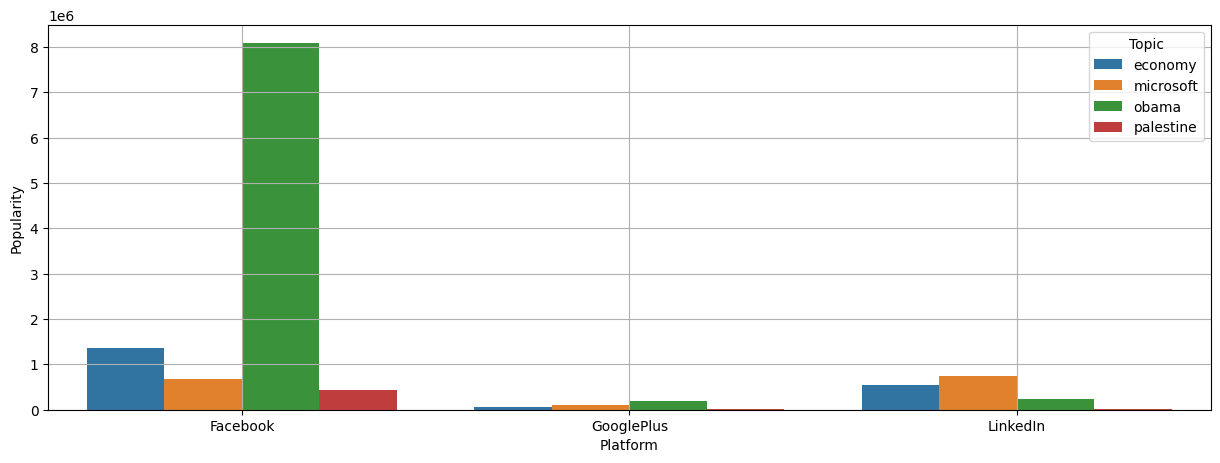

In [ ]:
# Chart - 1 visualization code
fp = df.groupby('Topic')['Facebook'].sum()
gp = df.groupby('Topic')['GooglePlus'].sum()
lp = df.groupby('Topic')['LinkedIn'].sum()

temp = pd.DataFrame([fp,gp,lp])
temp = pd.merge(left=temp.melt(),right=temp.transpose().melt(), on='value')

plt.figure(figsize=(15,5))

sns.barplot(x = temp.variable, y = temp.value, hue=temp.Topic)

plt.xlabel('Platform')
plt.ylabel('Popularity')
plt.grid()

plt.show()

**Above barplot describes the Popularity distribution of all topics across different platforms.**

Insights:

- If we compare platforms, Facebook seems to highly active campared to other platforms.
- In terms of topic popularity, politcal news related to 'Obama' is a hot topic that is most popular compared to other news topics.

#### Chart - 2

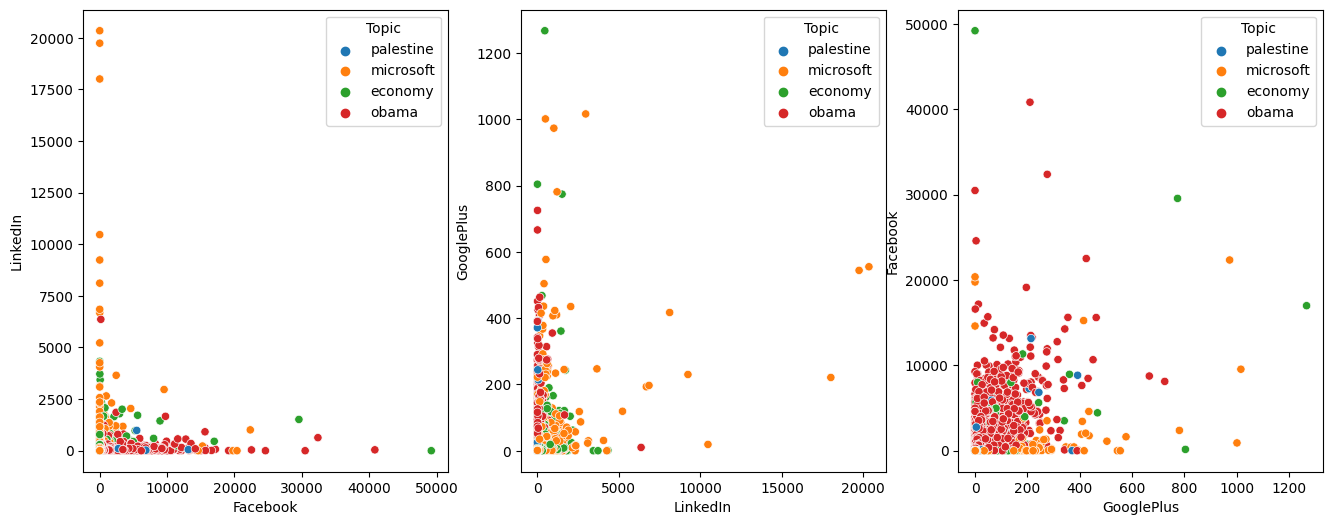

In [ ]:
# Chart - 2 visualization code

plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.scatterplot(x = df.Facebook, y = df.LinkedIn, hue = df.Topic)

plt.subplot(1,3,2)
sns.scatterplot(x = df.LinkedIn, y = df.GooglePlus, hue = df.Topic)

plt.subplot(1,3,3)
sns.scatterplot(x = df.GooglePlus, y = df.Facebook, hue = df.Topic)


plt.show()

***Scatter plot to track News Topic performace between 2 different platforms***

#### Chart - 3

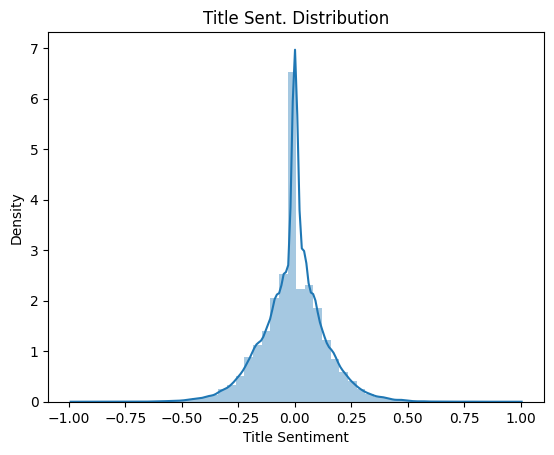

In [ ]:
# Chart - 3 visualization code

sns.distplot(x = df.SentimentTitle)

plt.title('Title Sent. Distribution')
plt.xlabel('Title Sentiment')
plt.show()

**A Histogram chart to display title sentiment distribution.**

Insights:

- Data is normally distributed or there is no skewness therefore no need for any kind of tranformation.

#### Chart - 4

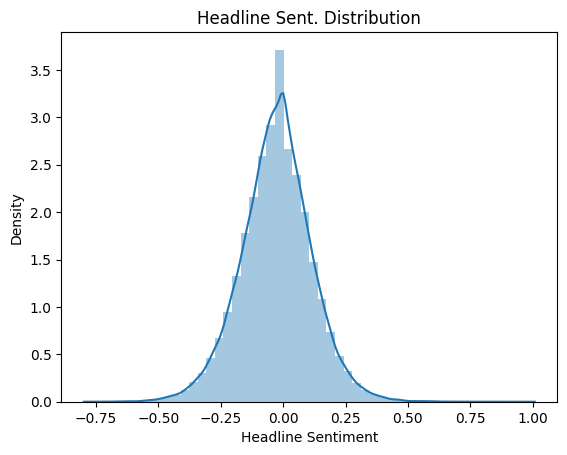

In [ ]:
# Chart - 4 visualization code

sns.distplot(x = df.SentimentHeadline)

plt.title('Headline Sent. Distribution')
plt.xlabel('Headline Sentiment')
plt.show()

**A Histogram chart to display Headline sentiment distribution.**

Insights :

- Data is normally distributed or there is no skewness therefore no need for any kind of tranformation.

#### Chart - 5

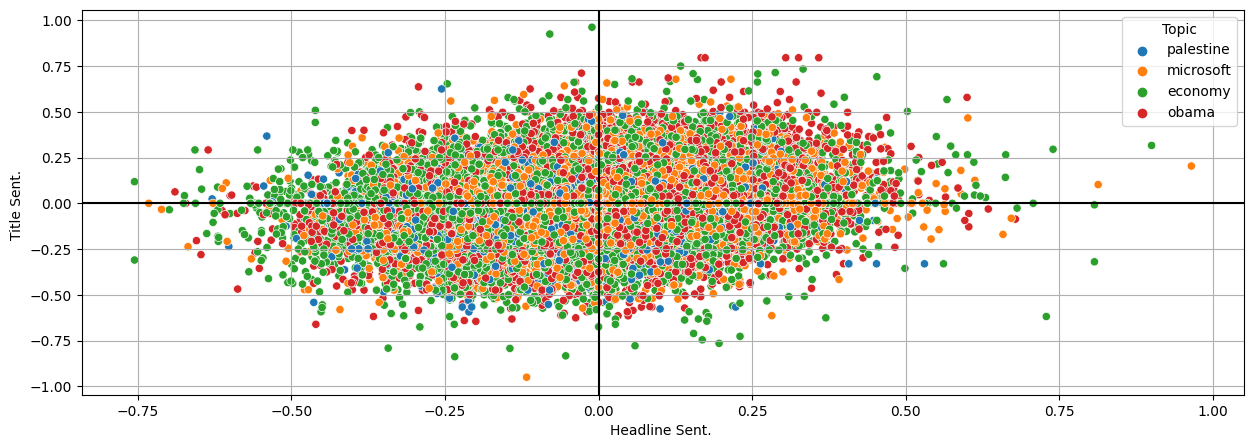

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(15,5))

sns.scatterplot(x = df.SentimentHeadline, y = df.SentimentTitle, hue=df.Topic)

plt.axhline(0.00, color = 'black')
plt.axvline(0.00, color = 'black')

plt.xlabel('Headline Sent. ')
plt.ylabel('Title Sent. ')

plt.grid()
plt.show()

**Scatter plot to describe the relation between between Headline and Title also to convey the distribution for different News Topics**

Insights:

- The density of political news topic is more towards the positive side or quadrant where as the topics related to economy tend to be more dense towards the negative part of the charts for some reason.

#### Chart - 6

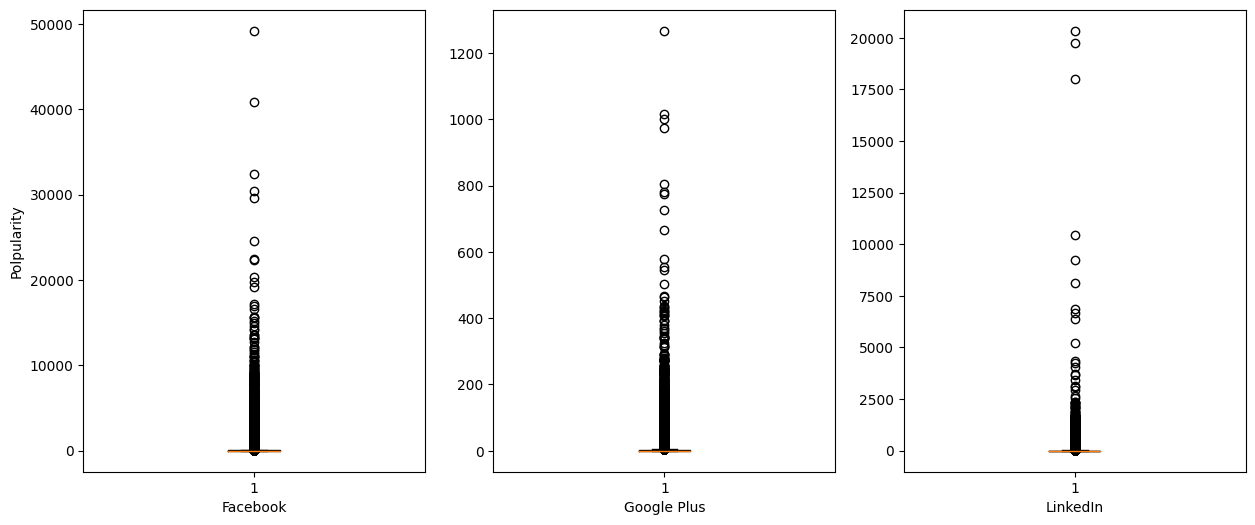

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.boxplot(df.Facebook)
plt.xlabel('Facebook')
plt.ylabel('Polpularity')


plt.subplot(1,3,2)
plt.boxplot(df.GooglePlus)
plt.xlabel('Google Plus')

plt.subplot(1,3,3)
plt.boxplot(df.LinkedIn)
plt.xlabel('LinkedIn')

plt.show()

***Boxplotting all there platforms to display Polularity distribution***

Insights:

- All three platforms (Google plus, Facebook, LinkedIn) contain Outliers which must be treated before ML modeling

#### Chart - 7

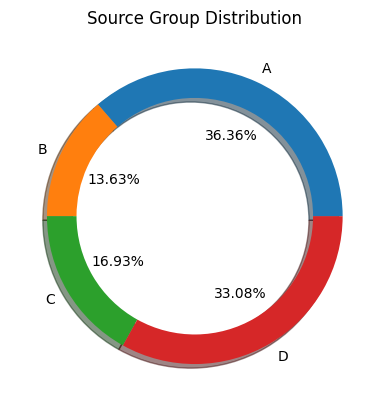

In [ ]:
# Chart - 7 visualization code

plt.pie(df.groupby('Source_grp')['Source_grp'].count(), labels=df.groupby('Source_grp')['Source_grp'].count().index,
        autopct="%.2f%%", explode = [0,0,0,0], shadow = True,wedgeprops=dict(width=0.2))

plt.title('Source Group Distribution')
plt.show()

***Pie plot to understand the contribution of Differnt sources***

Insights :

- Group A and Group D sources contribute to almost 70% of data.

#### Chart - 8

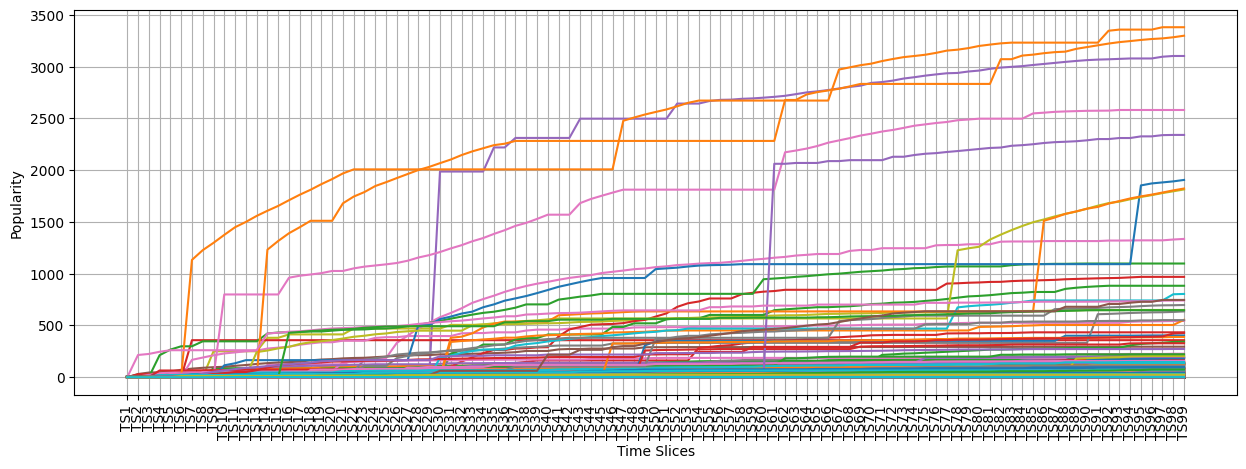

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(15,5))
for i in range(1000):
    plt.plot(fe.iloc[i,1:100])
plt.xticks(rotation=90)
plt.grid()
plt.xlabel('Time Slices')
plt.ylabel('Popularity')
plt.show()

***Line Chart to track the progress of news popularity with time.***

Insights :
- In the above line chart each line represents the activity done by single news article.
- On the x axis we have time slots, each slot represent one hour window.
- y axis is the popularity gain at each time slot by the news article.
- Most of the article Popularity range from 0 to 1500.

#### Chart - 9

In [ ]:
# df["total_popularity"] = df.Facebook + df.GooglePlus + df.LinkedIn

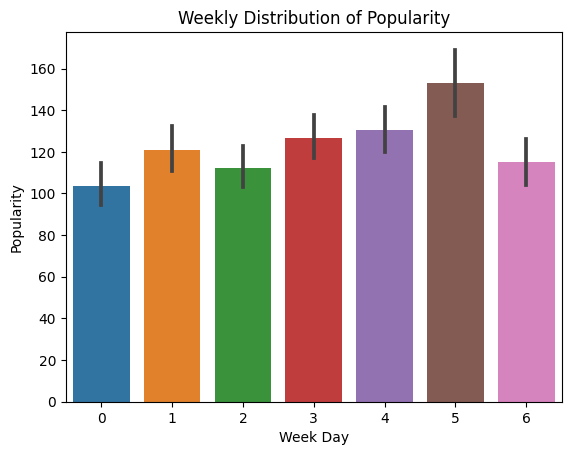

In [ ]:
# Chart - 9 visualization code

sns.barplot(x = df.weekday, y = df.Facebook)

plt.title('Weekly Distribution of Popularity')
plt.ylabel('Popularity')
plt.xlabel('Week Day')
plt.show()

***Weekly distribution of popularity***

Insights:
- Starting with 0 considered as 'monday' to all the way to 6 i.e. 'sunday'.
- Saturdays have the heighest popularity.

#### Chart - 10

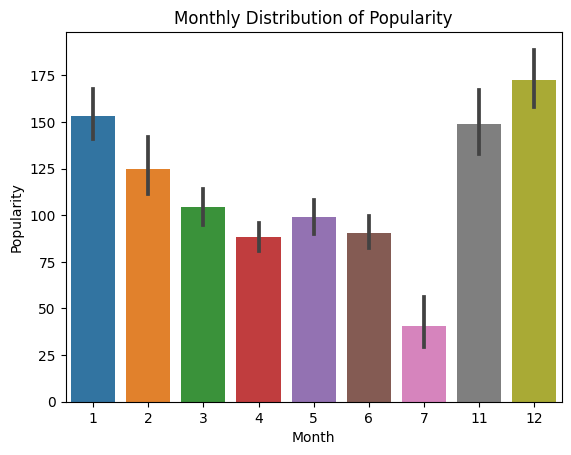

In [ ]:
# Chart - 10 visualization code
sns.barplot(x = df.Month, y = df.Facebook)

plt.title('Monthly Distribution of Popularity')
plt.ylabel('Popularity')
plt.xlabel('Month')
plt.show()

***Monthly distribution of popularity***

Insights:
- Popularity of news is high in start and end of the years.

#### Chart - 14 - Correlation Heatmap

In [ ]:
df.columns

Index(['IDLink', 'Title', 'Headline', 'Topic', 'SentimentTitle',
       'SentimentHeadline', 'Facebook', 'GooglePlus', 'LinkedIn', 'time',
       'weekday', 'Month', 'Source_grp', 'Sentiment_cat', 'Sentiment_head_cat',
       'total_popularity'],
      dtype='object')

<Axes: >

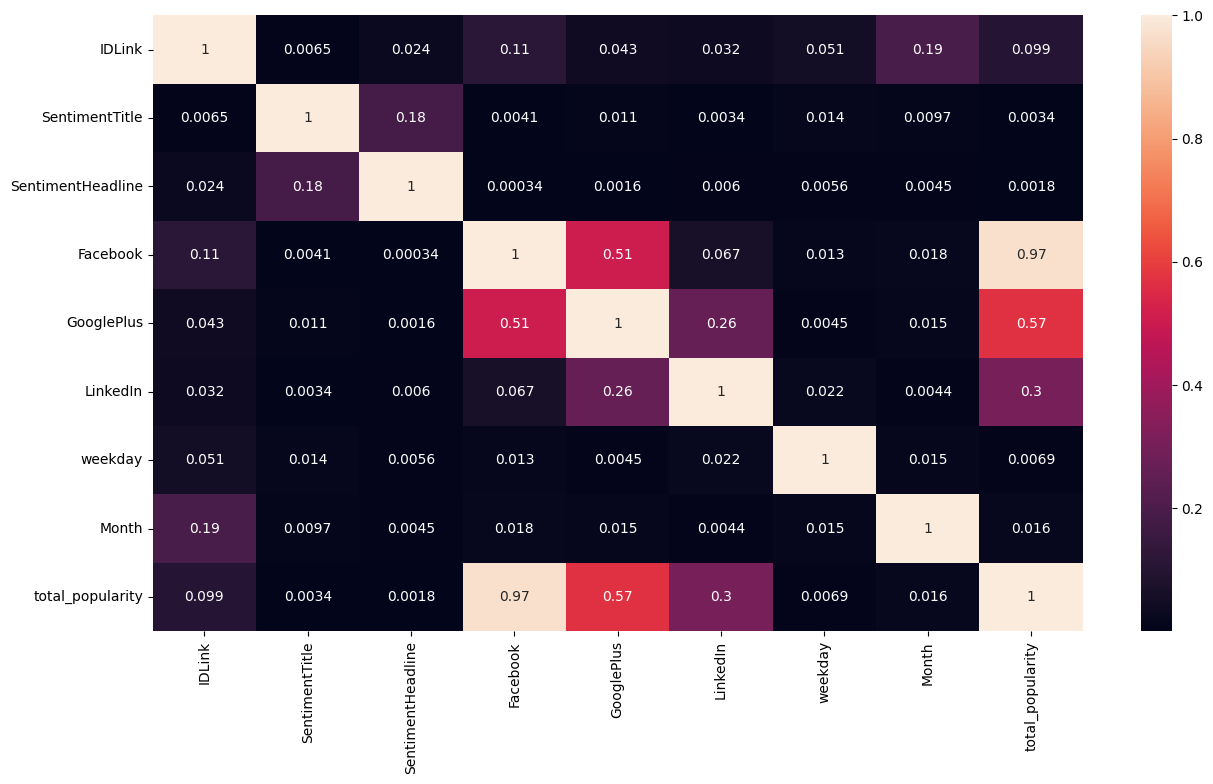

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize = (15,8))
sns.heatmap(abs(df.corr()), annot = True)


## ***6. Data Pre-processing***

### 1. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
df[['Facebook', 'GooglePlus','LinkedIn']]

,Facebook,GooglePlus,LinkedIn
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
87473,-1,3,5
87474,-1,0,1
87475,5,1,0
87476,0,0,0


In [ ]:
def iqr (column_name):
    iqr = df[f'{column_name}'].quantile([0.75]).values [0] - df[f'{column_name}'].quantile([0.25]).values [0]
    upper_wis = df[f'{column_name}'].quantile([0.75]).values [0] + (1.5 * iqr)
    lower_wis = df[f'{column_name}'].quantile([0.25]).values [0] - (1.5 * iqr)
    return print(f'{column_name} range = ', lower_wis, 'to', upper_wis)

platform = ['Facebook', 'GooglePlus','LinkedIn']
for i in platform:
    iqr(i)

Facebook range =  -57.0 to 95.0
GooglePlus range =  -3.0 to 5.0
LinkedIn range =  -6.0 to 10.0


In [ ]:
# Shape before treating outlier
print(df.shape)

# Uing interquartile method to treat outliers

df = df[(df.Facebook < 95.0) & (df.GooglePlus < 5.0) & (df.LinkedIn < 10.0)]

# Shape after treating outlier
df.shape

(87478, 16)


(59960, 16)

In [ ]:
df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)

### 2. Categorical Encoding

In [ ]:
df.columns

Index(['IDLink', 'Title', 'Headline', 'Topic', 'SentimentTitle',
       'SentimentHeadline', 'Facebook', 'GooglePlus', 'LinkedIn', 'time',
       'weekday', 'Month', 'Source_grp', 'Sentiment_cat', 'Sentiment_head_cat',
       'total_popularity'],
      dtype='object')

In [ ]:
df.head(3)

,IDLink,Title,Headline,Topic,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,time,weekday,Month,Source_grp,Sentiment_cat,Sentiment_head_cat,total_popularity
0,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",palestine,0.000000,-0.005906,0,0,0,14:03:00,6,2,D,Neutral,Neutral,0
1,81052.0,"Monday, 29 Feb 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",palestine,0.000000,0.048546,0,0,0,09:29:00,1,3,D,Neutral,Positive,0
2,80994.0,"Tuesday, 1 Mar 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",palestine,-0.243068,0.048546,0,0,0,00:15:00,1,3,D,Negative,Positive,0


In [ ]:
# Encode your categorical columns using OneHotEncoding

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False, drop = 'first')

encoded_col = pd.DataFrame(encoder.fit_transform(df[['Topic', 'weekday', 'Month', 'Source_grp', 'Sentiment_cat',	'Sentiment_head_cat']]),
                           columns=encoder.get_feature_names_out())

# df[['Topic', 'weekday', 'Month', 'Source_grp', 'Sentiment_cat',	'Sentiment_head_cat']]

encoded_col

,Topic_microsoft,Topic_obama,Topic_palestine,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,Month_2,...,Month_7,Month_11,Month_12,Source_grp_B,Source_grp_C,Source_grp_D,Sentiment_cat_Neutral,Sentiment_cat_Positive,Sentiment_head_cat_Neutral,Sentiment_head_cat_Positive
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59955,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
59956,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
59957,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
59958,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
df = pd.concat([df, encoded_col], axis = 1)

In [ ]:
df.drop(['Topic', 'weekday', 'Month', 'time', 'Source_grp', 'Sentiment_cat',	'Sentiment_head_cat'], axis = 1, inplace = True)

### 3. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.2 MB/s eta 0:00:00


In [ ]:
# Expand Contraction I'LL --> I Will
import contractions


df.Title = df.Title.apply(lambda x : contractions.fix(x))
df.Headline = df.Headline.apply(lambda x : contractions.fix(x))



#### 2. Lower Casing

In [ ]:
# Lower Casing

print('Before Lower casing = ', df.Headline[2])

df.Title = df.Title.apply(lambda x : x.lower())
df.Headline = df.Headline.apply(lambda x : x.lower())

print('After Lower casing = ', df.Headline[2])

Before Lower casing =  RAMALLAH, February 29, 2016 (WAFA) - The Government of Japan contributed $38.21 million to the United Nations Relief and Works Agency for Palestine Refugees in the Near East (UNRWA). 
After Lower casing =  ramallah, february 29, 2016 (wafa) - the government of japan contributed $38.21 million to the united nations relief and works agency for palestine refugees in the near east (unrwa). 


#### 3. Removing Punctuations

In [ ]:
import string


In [ ]:
df.Headline[2]

'ramallah, february 29, 2016 (wafa) - the government of japan contributed $38.21 million to the united nations relief and works agency for palestine refugees in the near east (unrwa). '

In [ ]:
# Remove Punctuations
pun = list(string.punctuation)

def remove_punc(x):
  non_punc = [i for i in x if i not in pun]
  return ''.join(non_punc)

df.Title = df.Title.apply(lambda x : remove_punc(x))
df.Headline = df.Headline.apply(lambda x : remove_punc(x))

df.Headline[2]

'ramallah february 29 2016 wafa  the government of japan contributed 3821 million to the united nations relief and works agency for palestine refugees in the near east unrwa '

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
digits = [str(i) for i in range(10)]

def remove_digits(x):
  no_digit = [i for i in x if i not in digits]
  return ''.join(no_digit)

df.Title = df.Title.apply(lambda x : remove_digits(x))
df.Headline = df.Headline.apply(lambda x : remove_digits(x))

df.Headline[2]

'ramallah february   wafa  the government of japan contributed  million to the united nations relief and works agency for palestine refugees in the near east unrwa '

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# !pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopw = list(stopwords.words('english'))
print(stopw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
df.Headline[4]

'quotin the coming six months there seems to be growing optimism in terms of the economic performance with  percent respondents feeling that the state of the indian economy would be betterquot said associated chambers of commerce and industrys assocham latest biz confidence survey quotthe underlying economic activity remains weak on account of the sustained decline in exports rainfall deficiency '

In [ ]:
def remove_stopwords(x):
    no_stopw = [i for i in x.split() if i not in stopw]
    return ' '.join(no_stopw)

df.Headline = df.Headline.apply(lambda x : remove_stopwords(x))
df.Title = df.Title.apply(lambda x : remove_stopwords(x))

df.Headline[4]

'quotin coming six months seems growing optimism terms economic performance percent respondents feeling state indian economy would betterquot said associated chambers commerce industrys assocham latest biz confidence survey quotthe underlying economic activity remains weak account sustained decline exports rainfall deficiency'

#### 7. Tokenization

In [ ]:
# Tokenization
nltk.download('punkt')

df.Headline = df.Headline.apply(lambda x : nltk.tokenize.word_tokenize(x))
df.Title = df.Title.apply(lambda x : nltk.tokenize.word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)


In [ ]:
# prompt: code for stemming

!pip install nltk
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df.Title = df.Title.apply(lambda x : ' '.join([stemmer.stem(i) for i in x]))
df.Headline = df.Headline.apply(lambda x : ' '.join([stemmer.stem(i) for i in x]))


#### 9. Text Vectorization

In [ ]:
temp =df.Headline + ' ' + df.Title
temp

0        ramallah februari wafa palestin liber organ ’ ...
1        ramallah februari wafa govern japan contribut ...
2        ramallah februari wafa govern japan contribut ...
3        ahead market rollout microsoft new band uk sch...
4        quotin come six month seem grow optim term eco...
                               ...                        
59955    june employ report view crucial gaug health ec...
59956    addit establish stimul econom polici budget co...
59957    palestinian govern spend nearli million annual...
59958    palestin youth orchestra prepar first uk tour ...
59959    goldstein proprietor tg travel group llc custo...
Length: 59960, dtype: object

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df = 150, max_df = 0.7, max_features=1000)
vector_col = vectorizer.fit_transform(temp)

In [ ]:
temp1 = pd.DataFrame(vector_col.toarray(), columns = [vectorizer.get_feature_names_out()])


In [ ]:
df.columns

Index(['IDLink', 'Title', 'Headline', 'SentimentTitle', 'SentimentHeadline',
       'Facebook', 'GooglePlus', 'LinkedIn', 'total_popularity',
       'Topic_microsoft', 'Topic_obama', 'Topic_palestine', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_11', 'Month_12', 'Source_grp_B', 'Source_grp_C', 'Source_grp_D',
       'Sentiment_cat_Neutral', 'Sentiment_cat_Positive',
       'Sentiment_head_cat_Neutral', 'Sentiment_head_cat_Positive'],
      dtype='object')

In [ ]:
main_df = pd.concat([df.drop(['Title', 'Headline', 'SentimentTitle', 'SentimentHeadline',
       'Facebook', 'GooglePlus', 'LinkedIn', 'total_popularity',
       'Topic_microsoft', 'Topic_obama', 'Topic_palestine', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_11', 'Month_12', 'Source_grp_B', 'Source_grp_C', 'Source_grp_D',
       'Sentiment_cat_Neutral', 'Sentiment_cat_Positive',
       'Sentiment_head_cat_Neutral', 'Sentiment_head_cat_Positive'], axis = 1), temp1], axis = 1)
main_df.columns = [str(x) for x in main_df.columns]

In [ ]:
# main_df = main_df.drop(['Title', 'Headline'], axis = 1)
main_df.head()

,IDLink,"('abba',)","('abe',)","('abl',)","('acceler',)","('access',)","('accord',)","('account',)","('accus',)","('achiev',)",...,"('xbox',)","('year',)","('yearold',)","('yellen',)","('yesterday',)","('yet',)","('york',)","('you',)","('young',)","('zika',)"
0,80690.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,81052.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,80994.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,311.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,252.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
main_df.columns

Index(['IDLink', '('abba',)', '('abe',)', '('abl',)', '('acceler',)',
       '('access',)', '('accord',)', '('account',)', '('accus',)',
       '('achiev',)',
       ...
       '('xbox',)', '('year',)', '('yearold',)', '('yellen',)',
       '('yesterday',)', '('yet',)', '('york',)', '('you',)', '('young',)',
       '('zika',)'],
      dtype='object', length=1001)

In [ ]:
df.columns

Index(['IDLink', 'Title', 'Headline', 'SentimentTitle', 'SentimentHeadline',
       'Facebook', 'GooglePlus', 'LinkedIn', 'total_popularity',
       'Topic_microsoft', 'Topic_obama', 'Topic_palestine', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_11', 'Month_12', 'Source_grp_B', 'Source_grp_C', 'Source_grp_D',
       'Sentiment_cat_Neutral', 'Sentiment_cat_Positive',
       'Sentiment_head_cat_Neutral', 'Sentiment_head_cat_Positive'],
      dtype='object')

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# # Manipulate Features to minimize feature correlation and create new features
df3 = df.copy() #backup
df4 = main_df.copy() #backup

In [ ]:
df.drop(['Headline', 'Title'], axis = 1, inplace = True)

In [ ]:
# Combining all the time slot data and taking a 9hr window

facebook = pd.concat([fe, fo, fp, fm], axis = 0).iloc[:,:-1:18]
google = pd.concat([ge, go, gp, gm], axis = 0).iloc[:,:-1:18]
linkedin = pd.concat([le, lo, lp, lm], axis = 0).iloc[:,:-1:18]


In [ ]:
facebook

,IDLink,TS18,TS36,TS54,TS72,TS90,TS108,TS126,TS144
0,1.0,8.0,9.0,12.0,12.0,12.0,12.0,12.0,13.0
1,2.0,4.0,18.0,28.0,36.0,41.0,42.0,42.0,42.0
2,3.0,-1.0,-1.0,69.0,82.0,86.0,94.0,98.0,98.0
3,4.0,-1.0,-1.0,5.0,5.0,5.0,5.0,6.0,7.0
4,5.0,-1.0,-1.0,23.0,28.0,29.0,34.0,34.0,34.0
...,...,...,...,...,...,...,...,...,...
18526,58442.0,-1.0,-1.0,22.0,22.0,22.0,22.0,22.0,22.0
18527,58443.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0
18528,58448.0,-1.0,-1.0,37.0,37.0,37.0,37.0,37.0,37.0
18529,58449.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0


In [ ]:
facebook[facebook.IDLink == 61851.0]

,IDLink,TS18,TS36,TS54,TS72,TS90,TS108,TS126,TS144


In [ ]:
df = pd.merge(left = df, right = facebook, on = 'IDLink', how = 'left')

df = pd.merge(left = df, right = google, on = 'IDLink', how = 'left')

df = pd.merge(left = df, right = linkedin, on = 'IDLink', how = 'left')

df.head()

,IDLink,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,total_popularity,Topic_microsoft,Topic_obama,Topic_palestine,...,TS126_y,TS144_y,TS18,TS36,TS54,TS72,TS90,TS108,TS126,TS144
0,80690.0,0.000000,-0.005906,0,0,0,0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,81052.0,0.000000,0.048546,0,0,0,0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,80994.0,-0.243068,0.048546,0,0,0,0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,311.0,0.000000,-0.132812,0,0,0,0,1.0,0.0,0.0,...,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
4,252.0,-0.082022,0.205537,0,0,0,0,0.0,0.0,0.0,...,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0


In [ ]:
df.iloc[:,:-20]

,IDLink,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,total_popularity,Topic_microsoft,Topic_obama,Topic_palestine,...,Source_grp_C,Source_grp_D,Sentiment_cat_Neutral,Sentiment_cat_Positive,Sentiment_head_cat_Neutral,Sentiment_head_cat_Positive,TS18_x,TS36_x,TS54_x,TS72_x
0,80690.0,0.000000,-0.005906,0,0,0,0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
1,81052.0,0.000000,0.048546,0,0,0,0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
2,80994.0,-0.243068,0.048546,0,0,0,0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
3,311.0,0.000000,-0.132812,0,0,0,0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0
4,252.0,-0.082022,0.205537,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59955,61851.0,0.104284,0.044943,-1,3,5,7,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN
59956,61865.0,0.072194,0.000000,-1,0,1,0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN
59957,104793.0,0.291667,-0.139754,5,1,0,6,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
59958,104794.0,0.121534,0.092313,0,0,0,0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

IDLink                             0
SentimentTitle                     0
SentimentHeadline                  0
Facebook                           0
GooglePlus                         0
LinkedIn                           0
total_popularity                   0
Topic_microsoft                    0
Topic_obama                        0
Topic_palestine                    0
weekday_1                          0
weekday_2                          0
weekday_3                          0
weekday_4                          0
weekday_5                          0
weekday_6                          0
Month_2                            0
Month_3                            0
Month_4                            0
Month_5                            0
Month_6                            0
Month_7                            0
Month_11                           0
Month_12                           0
Source_grp_B                       0
Source_grp_C                       0
Source_grp_D                       0
S

In [ ]:
df.fillna(-1, inplace = True)

In [ ]:
df.isnull().sum()

IDLink                         0
SentimentTitle                 0
SentimentHeadline              0
Facebook                       0
GooglePlus                     0
LinkedIn                       0
total_popularity               0
Topic_microsoft                0
Topic_obama                    0
Topic_palestine                0
weekday_1                      0
weekday_2                      0
weekday_3                      0
weekday_4                      0
weekday_5                      0
weekday_6                      0
Month_2                        0
Month_3                        0
Month_4                        0
Month_5                        0
Month_6                        0
Month_7                        0
Month_11                       0
Month_12                       0
Source_grp_B                   0
Source_grp_C                   0
Source_grp_D                   0
Sentiment_cat_Neutral          0
Sentiment_cat_Positive         0
Sentiment_head_cat_Neutral     0
Sentiment_

#### 2. Feature Selection

In [ ]:
df.columns

Index(['IDLink', 'SentimentTitle', 'SentimentHeadline', 'Facebook',
       'GooglePlus', 'LinkedIn', 'total_popularity', 'Topic_microsoft',
       'Topic_obama', 'Topic_palestine', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_11', 'Month_12', 'Source_grp_B',
       'Source_grp_C', 'Source_grp_D', 'Sentiment_cat_Neutral',
       'Sentiment_cat_Positive', 'Sentiment_head_cat_Neutral',
       'Sentiment_head_cat_Positive', 'TS18_x', 'TS36_x', 'TS54_x', 'TS72_x',
       'TS90_x', 'TS108_x', 'TS126_x', 'TS144_x', 'TS18_y', 'TS36_y', 'TS54_y',
       'TS72_y', 'TS90_y', 'TS108_y', 'TS126_y', 'TS144_y', 'TS18', 'TS36',
       'TS54', 'TS72', 'TS90', 'TS108', 'TS126', 'TS144'],
      dtype='object')

In [ ]:
x = df.drop(['IDLink', 'Facebook', 'GooglePlus',
       'LinkedIn', 'total_popularity','Sentiment_cat_Neutral',
       'Sentiment_cat_Positive', 'Sentiment_head_cat_Neutral',
       'Sentiment_head_cat_Positive'], axis = 1)
x_cat = df.drop(['IDLink', 'Facebook', 'GooglePlus',
       'LinkedIn', 'total_popularity','SentimentTitle', 'SentimentHeadline'], axis = 1)
y = df[['total_popularity']]

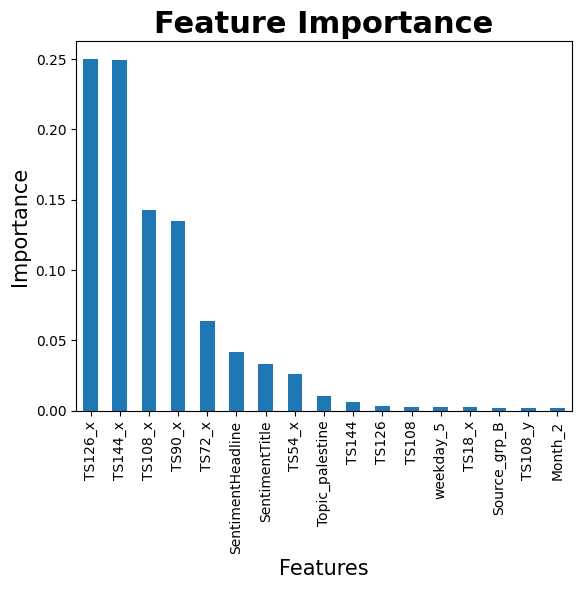

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)

feat_importances.nlargest(17).plot(kind='bar')
plt.xlabel('Features', fontdict = {'fontsize':15})
plt.ylabel('Importance', fontdict = {'fontsize':15})
plt.title('Feature Importance',fontdict = {'fontsize':22, 'fontweight':'bold'})
plt.show()

<Axes: >

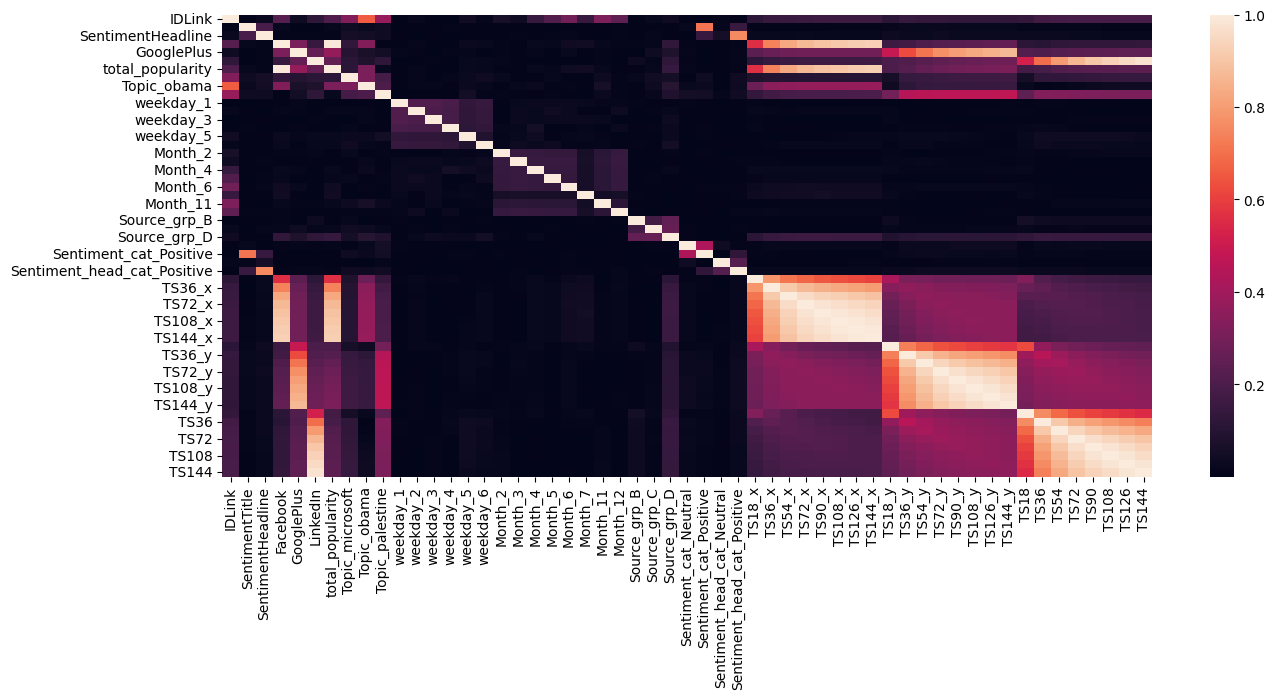

In [ ]:
plt.figure(figsize = (15,6))
sns.heatmap(abs(df.corr()), annot = False)

In [ ]:
x.columns

Index(['SentimentTitle', 'SentimentHeadline', 'Topic_microsoft', 'Topic_obama',
       'Topic_palestine', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_11', 'Month_12', 'Source_grp_B',
       'Source_grp_C', 'Source_grp_D', 'TS18_x', 'TS36_x', 'TS54_x', 'TS72_x',
       'TS90_x', 'TS108_x', 'TS126_x', 'TS144_x', 'TS18_y', 'TS36_y', 'TS54_y',
       'TS72_y', 'TS90_y', 'TS108_y', 'TS126_y', 'TS144_y', 'TS18', 'TS36',
       'TS54', 'TS72', 'TS90', 'TS108', 'TS126', 'TS144'],
      dtype='object')

<Axes: >

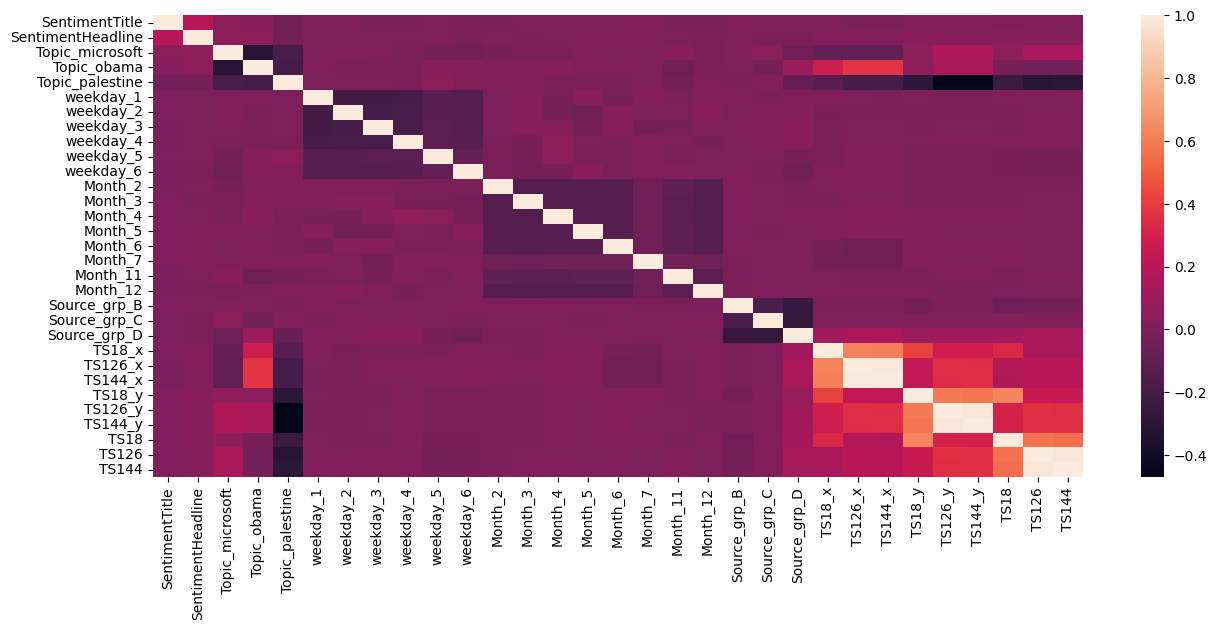

In [ ]:
plt.figure(figsize = (15,6))

sns.heatmap(x.drop([ 'TS36_x', 'TS54_x', 'TS72_x',
       'TS90_x', 'TS108_x','TS36_y', 'TS54_y', 'TS72_y',
       'TS90_y', 'TS108_y', 'TS36', 'TS54', 'TS72', 'TS90',
       'TS108'], axis = 1).corr())

### 5. Data Transformation

<Axes: ylabel='Density'>

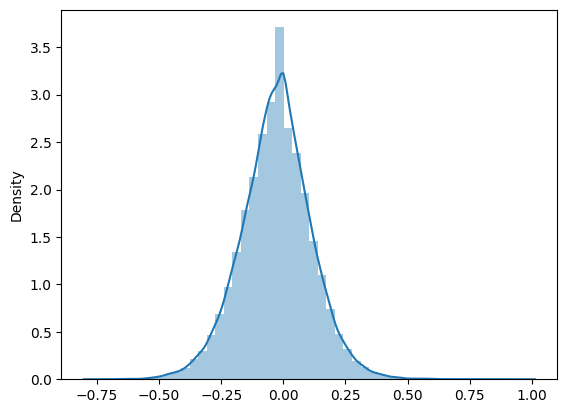

In [ ]:
sns.distplot(x = x.SentimentHeadline)

<Axes: ylabel='Density'>

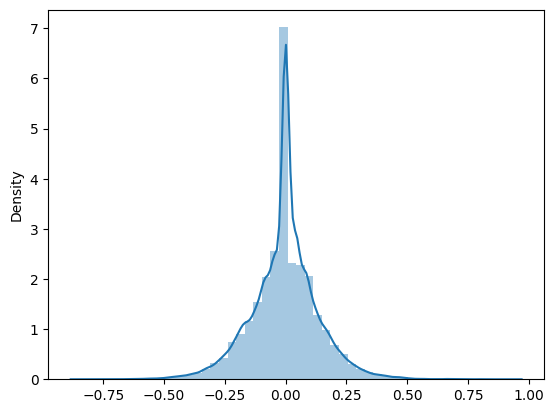

In [ ]:
sns.distplot(x = x.SentimentTitle)

- No need to transform the data since features are normally distributed

### 6. Data Scaling

In [ ]:
# Scaling your data
# from sklearn.preprocessing import StandardScaler

# scalar = StandardScaler()

# scalar.fit_transform(x)

##### Which method have you used to scale you data and why?

### 7. Data Splitting

In [ ]:
df.columns

Index(['IDLink', 'SentimentTitle', 'SentimentHeadline', 'Facebook',
       'GooglePlus', 'LinkedIn', 'total_popularity', 'Topic_microsoft',
       'Topic_obama', 'Topic_palestine', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_11', 'Month_12', 'Source_grp_B',
       'Source_grp_C', 'Source_grp_D', 'Sentiment_cat_Neutral',
       'Sentiment_cat_Positive', 'Sentiment_head_cat_Neutral',
       'Sentiment_head_cat_Positive', 'TS18_x', 'TS36_x', 'TS54_x', 'TS72_x',
       'TS90_x', 'TS108_x', 'TS126_x', 'TS144_x', 'TS18_y', 'TS36_y', 'TS54_y',
       'TS72_y', 'TS90_y', 'TS108_y', 'TS126_y', 'TS144_y', 'TS18', 'TS36',
       'TS54', 'TS72', 'TS90', 'TS108', 'TS126', 'TS144'],
      dtype='object')

In [ ]:
master_df = pd.merge(df.drop(['Facebook', 'GooglePlus',
       'LinkedIn','Sentiment_cat_Neutral',
       'Sentiment_cat_Positive', 'Sentiment_head_cat_Neutral',
       'Sentiment_head_cat_Positive',
        'TS36_x', 'TS54_x','TS90_x', 'TS108_x', 'TS144_x',
        'TS36_y', 'TS54_y', 'TS90_y', 'TS108_y',  'TS144_y',
        'TS36','TS54', 'TS90', 'TS108', 'TS144'], axis = 1), right = main_df, on = 'IDLink', how = 'left').drop('IDLink', axis = 1)

In [ ]:
x = pd.merge(df.drop(['Facebook', 'GooglePlus',
       'LinkedIn','Sentiment_cat_Neutral',
       'Sentiment_cat_Positive', 'Sentiment_head_cat_Neutral',
       'Sentiment_head_cat_Positive',
        'TS36_x', 'TS54_x','TS90_x', 'TS108_x', 'TS144_x',
        'TS36_y', 'TS54_y', 'TS90_y', 'TS108_y',  'TS144_y',
        'TS36','TS54', 'TS90', 'TS108', 'TS144', 'total_popularity'], axis = 1), right = main_df, on = 'IDLink', how = 'left').drop('IDLink', axis = 1)  # with all 6hr time slots


y = df.total_popularity

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.2, random_state=23)

In [ ]:
# x = pd.merge(df.drop(['Facebook', 'GooglePlus',
#        'LinkedIn', 'total_popularity','Sentiment_cat_Neutral',
#        'Sentiment_cat_Positive', 'Sentiment_head_cat_Neutral',
#        'Sentiment_head_cat_Positive', 'TS36_x', 'TS54_x', 'TS72_x',
#        'TS90_x', 'TS108_x','TS36_y', 'TS54_y', 'TS72_y',
#        'TS90_y', 'TS108_y', 'TS36', 'TS54', 'TS72', 'TS90',
#        'TS108'], axis = 1), right = main_df, on = 'IDLink', how = 'left').drop('IDLink', axis = 1)  #with countvectorizer

# y = df.total_popularity

# from sklearn.model_selection import train_test_split

# xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.2, random_state=23)

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

# xtemp = df.drop(['IDLink', 'Facebook', 'GooglePlus',
#        'LinkedIn', 'total_popularity','Sentiment_cat_Neutral',
#        'Sentiment_cat_Positive', 'Sentiment_head_cat_Neutral',
#        'Sentiment_head_cat_Positive', 'TS36_x', 'TS54_x', 'TS72_x',
#        'TS90_x', 'TS108_x','TS36_y', 'TS54_y', 'TS72_y',
#        'TS90_y', 'TS108_y', 'TS36', 'TS54', 'TS72', 'TS90',
#        'TS108'], axis = 1)                                                          #without countvectorizer


# y = df.total_popularity

# from sklearn.model_selection import train_test_split

# xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.2, random_state=23)

In [ ]:
pip install pycaret

In [ ]:
import pycaret

In [ ]:
from pycaret.regression import setup, compare_models, evaluate_model, predict_model, save_model

s = setup(master_df, target = 'total_popularity')


,Description,Value
0,Session id,1270
1,Target,total_popularity
2,Target type,Regression
3,Original data shape,"(59960, 1032)"
4,Transformed data shape,"(59960, 1032)"
5,Transformed train set shape,"(41972, 1032)"
6,Transformed test set shape,"(17988, 1032)"
7,Numeric features,1031
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models(include = ['lr', 'ridge', 'knn', 'lasso', 'dt'])


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,2.2180,36.2964,6.0181,0.8849,0.6558,0.4800,3.7440
ridge,Ridge Regression,2.2165,36.2912,6.0176,0.8849,0.6554,0.4795,1.1270
knn,K Neighbors Regressor,2.0194,38.7302,6.2172,0.8772,0.5750,0.4072,9.8530
lasso,Lasso Regression,3.0092,47.9868,6.9208,0.8479,0.8168,0.6600,0.9420
dt,Decision Tree Regressor,1.8866,57.2581,7.5593,0.8182,0.5954,0.3080,11.7010


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
best_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}

In [ ]:
# include = [lr, ridge, knn, lasso, dt]

save_model(best_model, 'ridge')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['SentimentTitle',
                                              'SentimentHeadline',
                                              'Topic_microsoft', 'Topic_obama',
                                              'Topic_palestine', 'weekday_1',
                                              'weekday_2', 'weekday_3',
                                              'weekday_4', 'weekday_5',
                                              'weekday_6', 'Month_2', 'Month_3',
                                              'Month_4', 'Month_5', 'Month_6',
                                              'Month_7', 'Month_11', 'Month_12',
                                              'Source_grp_B',...',
                                              'Source_grp_D', 'TS18_x', 'TS72_x',
                                              'TS126_x', 'TS18_y', 'TS72_y',
                     

In [ ]:
from pycaret.regression import *


model = load_model('ridge')

Transformation Pipeline and Model Successfully Loaded


## ***8. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


# Fit the Algorithm
lrmodel = lr.fit(xtrain, ytrain)

# Predict on the model
testpred = lrmodel.predict(xtest)
trainpred = lrmodel.predict(xtrain)

In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

print(f'''
Test Scores
MAE = {mean_absolute_error(ytest, testpred)}
MSE = {mean_squared_error(ytest, testpred)}
r2 = {r2_score(ytest, testpred)}

Train Scores
MAE = {mean_absolute_error(ytrain, trainpred)}
MSE = {mean_squared_error(ytrain, trainpred)}
r2 = {r2_score(ytrain, trainpred)}
''')


Test Scores
MAE = 2.235315709893015
MSE = 37.36834785496148
r2 = 0.8845929101064656

Train Scores
MAE = 2.193789113025217
MSE = 37.029868478757436
r2 = 0.8819815486027196



In [ ]:
# using lasso and ridge to treat overfitting

from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=0.1)
lasso.fit(xtrain, ytrain)
lasso_pred = lasso.predict(xtest)
print(f'''
Lasso Scores
MAE = {mean_absolute_error(ytest, lasso_pred)}
MSE = {mean_squared_error(ytest, lasso_pred)}
r2 = {r2_score(ytest, lasso_pred)}
''')

ridge = Ridge(alpha=0.1)
ridge.fit(xtrain, ytrain)
ridge_pred = ridge.predict(xtest)
print(f'''
Ridge Scores
MAE = {mean_absolute_error(ytest, ridge_pred)}
MSE = {mean_squared_error(ytest, ridge_pred)}
r2 = {r2_score(ytest, ridge_pred)}
''')



Lasso Scores
MAE = 1.983943695939452
MSE = 37.50305602528969
r2 = 0.884176882135874


Ridge Scores
MAE = 2.2352075776345264
MSE = 37.367887379657766
r2 = 0.8845943322221816



In [ ]:
# different alpha values for ridge and lasso using randomsearchcv

from sklearn.model_selection import RandomizedSearchCV
# Ridge
ridge_model = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 0.5, 1, 10, 100]}
ridge_randomized_search = RandomizedSearchCV(ridge_model, ridge_params, n_iter=100)
ridge_randomized_search.fit(xtrain, ytrain)
ridge_best_params = ridge_randomized_search.best_params_
ridge_best_score = ridge_randomized_search.best_score_
print(f'Ridge best params: {ridge_best_params}')
print(f'Ridge best score: {ridge_best_score}')

# Lasso
lasso_model = Lasso()
lasso_params = {'alpha': [ 0.01, 0.1, 0.5, 1, 10, 100]}
lasso_randomized_search = RandomizedSearchCV(lasso_model, lasso_params, n_iter=100)
lasso_randomized_search.fit(xtrain, ytrain)
lasso_best_params = lasso_randomized_search.best_params_
lasso_best_score = lasso_randomized_search.best_score_
print(f'Lasso best params: {lasso_best_params}')
print(f'Lasso best score: {lasso_best_score}')


Ridge best params: {'alpha': 100}
Ridge best score: 0.8772331299967032
Lasso best params: {'alpha': 0.01}
Lasso best score: 0.8778445003562876


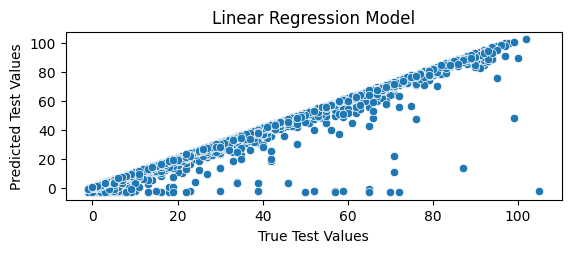

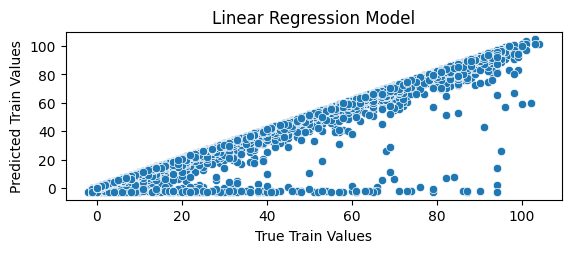

In [ ]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt

plt.subplot(2,1,1)
sns.scatterplot(x = ytest, y = testpred)
plt.xlabel('True Test Values')
plt.ylabel('Predicted Test Values')
plt.title('Linear Regression Model')
plt.show()

plt.subplot(2,1,2)
sns.scatterplot(x = ytrain, y = trainpred)
plt.xlabel('True Train Values')
plt.ylabel('Predicted Train Values')
plt.title('Linear Regression Model')
plt.show()

### ML Model - 2

In [ ]:
# ML Model - 2 Implementation
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)


# Fit the Algorithm
dtrmodel = dtr.fit(xtrain, ytrain)

# Predict on the model
testpred = dtrmodel.predict(xtest)
trainpred = dtrmodel.predict(xtrain)

In [ ]:
print(f'''
Test Scores
MAE = {mean_absolute_error(ytest, testpred)}
MSE = {mean_squared_error(ytest, testpred)}
r2 = {r2_score(ytest, testpred)}

Train Scores
MAE = {mean_absolute_error(ytrain, trainpred)}
MSE = {mean_squared_error(ytrain, trainpred)}
r2 = {r2_score(ytrain, trainpred)}
''')


Test Scores
MAE = 1.237783522348232
MSE = 23.861136591060706
r2 = 0.9263081058275681
      
Train Scores
MAE = 0.00066711140760507
MSE = 0.005295196797865244
r2 = 0.9999831235985543      



### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()


# Fit the Algorithm
knrmodel = knr.fit(xtrain, ytrain)

# Predict on the model
testpred = knrmodel.predict(xtest)
trainpred = knrmodel.predict(xtrain)

In [ ]:
print(f'''
Test Scores
MAE = {mean_absolute_error(ytest, testpred)}
MSE = {mean_squared_error(ytest, testpred)}
r2 = {r2_score(ytest, testpred)}

Train Scores
MAE = {mean_absolute_error(ytrain, trainpred)}
MSE = {mean_squared_error(ytrain, trainpred)}
r2 = {r2_score(ytrain, trainpred)}
''')


Test Scores
MAE = 0.7432454969979987
MSE = 7.562231487658438
r2 = 0.9766450705158474
      
Train Scores
MAE = 0.5857863575717145
MSE = 4.508553202134756
r2 = 0.985630722202985      



### ML Model - 4

In [ ]:
# prompt: code to fit an svr model on xtrain ytrain and also get the evaluation scores

from sklearn.svm import SVR
svr=SVR()
svr.fit(xtrain,ytrain)
svr_pred=svr.predict(xtest)
print(f'''
SVR Scores
MAE = {mean_absolute_error(ytest, svr_pred)}
MSE = {mean_squared_error(ytest, svr_pred)}
r2 = {r2_score(ytest, svr_pred)}
''')



SVR Scores
MAE = 0.9706085075579177
MSE = 16.77545151777328
r2 = 0.9481912861432743

